In [3]:
#map-colouring
def is_safe(graph, color, v, c):
    for i in range(len(graph[v])):
        if graph[v][i] == 1 and color[i] == c:
            return False
    return True

def map_coloring_util(graph, m, color, v):
    if v == len(graph):
        return True

    for c in range(1, m + 1):
        if is_safe(graph, color, v, c):
            color[v] = c
            if map_coloring_util(graph, m, color, v + 1):
                return True
            color[v] = 0

    return False

def map_coloring(graph, m):
    color = [0] * len(graph)
    if map_coloring_util(graph, m, color, 0):
        return color
    else:
        return None

# Function to get user input
def get_user_input():
    n = int(input("Enter the number of vertices: "))
    graph = [[0] * n for _ in range(n)]

    edges = int(input("Enter the number of edges: "))
    print("Enter the edges (format: u v where u and v are 0-indexed vertex numbers):")
    for _ in range(edges):
        u, v = map(int, input().split())
        graph[u][v] = 1
        graph[v][u] = 1

    m = int(input("Enter the number of colors: "))
    return graph, m

# Main function
def main():
    graph, m = get_user_input()
    result = map_coloring(graph, m)

    if result:
        print("Solution exists: ", result)
    else:
        print("No solution exists")

if __name__ == "__main__":
    main()


Enter the number of vertices: 6
Enter the number of edges: 4
Enter the edges (format: u v where u and v are 0-indexed vertex numbers):
0 1
2 3
0 2
4 1
Enter the number of colors: 3
Solution exists:  [1, 2, 2, 1, 1, 1]


Enter the number of nodes: 4
Enter node 1: a
Enter node 2: b
Enter node 3: c
Enter node 4: d
Enter the number of edges: 4
Enter edge 1 (format: node1 node2): a c
Enter edge 2 (format: node1 node2): a b
Enter edge 3 (format: node1 node2): b d
Enter edge 4 (format: node1 node2): c d
Enter the number of colors: 3
Enter color 1: pink
Enter color 2: green
Enter color 3: blue


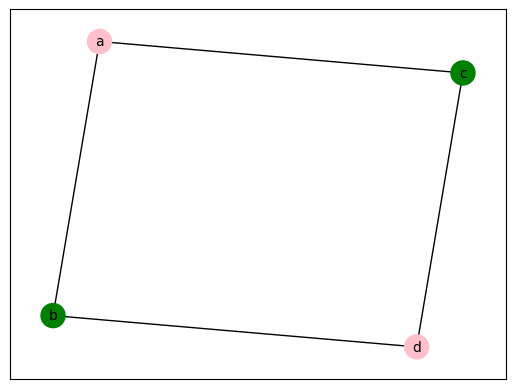

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Get the nodes and edges from the user
num_nodes = int(input("Enter the number of nodes: "))
nodes = []
for i in range(num_nodes):
    node = input(f"Enter node {i+1}: ")
    nodes.append(node)

num_edges = int(input("Enter the number of edges: "))
edges = []
for i in range(num_edges):
    edge = input(f"Enter edge {i+1} (format: node1 node2): ").split()
    edges.append(tuple(edge))

# Get the colors from the user
num_colors = int(input("Enter the number of colors: "))
colors = []
for i in range(num_colors):
    color = input(f"Enter color {i+1}: ")
    colors.append(color)

# Define the map as a graph
G = nx.Graph()
G.add_nodes_from(nodes)  # nodes
G.add_edges_from(edges)  # edges

# Function to check if a color is safe for a node
def is_safe(node, color, colored_nodes):
    for neighbor in G.neighbors(node):
        if neighbor in colored_nodes and colored_nodes[neighbor] == color:
            return False
    return True

# Function to color the map
def color_map():
    colored_nodes = {}
    for node in G.nodes():
        for color in colors:
            if is_safe(node, color, colored_nodes):
                colored_nodes[node] = color
                break
        else:
            return None  # cannot color the node with the given colors
    return colored_nodes

# Color the map
colored_nodes = color_map()

if colored_nodes is None:
    print("Insufficient colors to color the graph.")
else:
    # Draw the graph with colors
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color=[colored_nodes[node] for node in G.nodes()])
    nx.draw_networkx_edges(G, pos, edge_color='black')
    nx.draw_networkx_labels(G, pos, font_size=10)
    plt.show()